# Retail - Customer Segmenatation & Purchase behaviour

'''Problem Statement
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).'''

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance # For calculating spatial distance of sample points with scentroids
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans # Perfoaming Customer segmentation
import matplotlib.image as mpimg  # Loading tableau screenshot in jupyter

%matplotlib inline

In [2]:
# Loading the dataset

train_df = pd.read_excel(r"G:\Simplilearn\Capstone_Project\Retail_project\train.xlsx")
test_df = pd.read_excel(r"G:\Simplilearn\Capstone_Project\Retail_project\test.xlsx")

# Task for Week - 0

In [3]:
train_df.shape,test_df.shape

((379336, 8), (162573, 8))

In [4]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [5]:
# Checking for null values
train_df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [6]:
# About 7K transaction have qty less that zero
train_df.loc[train_df.Quantity < 0].shape

(7386, 8)

# Task for Week - 1

In [7]:
# Dropping Customer ID - since this is the only unique value to identify our customers
train_df.dropna(subset=['CustomerID'],inplace = True)

In [8]:
# We have 6217 records where transaction had quantity less than zero
train_df.loc[train_df["Quantity"] < 0].shape

(6217, 8)

In [9]:
# We have 31 transaction where Unit Price were recorded as zero
train_df.loc[train_df["UnitPrice"] < 0.00001].shape

(31, 8)

In [10]:
# There 2656 duplicate records in the transaction
train_df.drop_duplicates().shape,train_df.shape

((282420, 8), (285076, 8))

In [11]:
# By not passing any columns in argument it takes all columns
train_df.drop_duplicates(inplace=True)

In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,282420.0,12.110283,297.109127,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,282420.0,3.526323,80.691250,0.0,1.25,1.95,3.75,38970.0
CustomerID,282420.0,15283.894880,1712.665383,12346.0,13952.00,15150.00,16788.00,18287.0


In [13]:
train_df.loc[train_df["InvoiceNo"].str.contains("C") == True,"Cancel"] = "Y"

In [14]:
train_df.loc[train_df["InvoiceNo"].str.contains("C") != True,"Cancel"] = "N"

In [15]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,N
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,N
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,N
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,N
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,N


In [16]:
# 37 unique country
train_df.Country.nunique()

37

In [17]:
# Count of transaction where Unit Price = zero
train_df.loc[train_df["UnitPrice"] < 0.00001].shape

(31, 9)

In [18]:
# Calculating amount 
train_df["Amount"] = train_df["Quantity"] * train_df["UnitPrice"]

In [19]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Amount
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,N,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,N,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,N,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,N,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,N,15.00


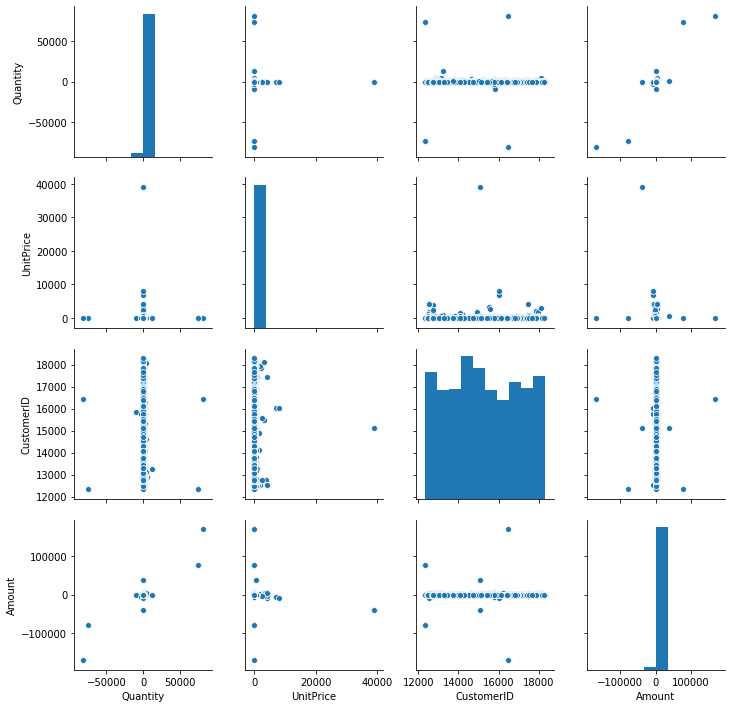

In [20]:
# Exploring the distribution of whole dataset
sns.pairplot(train_df)

In [21]:
grouped  = train_df.groupby(["Country"]).sum()
grouped.head()

,Quantity,UnitPrice,CustomerID,Amount
Country,,,,
Australia,56757,2656.95,10826801.0,89990.16
Austria,3577,1094.61,3459722.0,7016.08
Bahrain,234,54.60,148254.0,442.10
Belgium,16500,5299.07,18173596.0,29040.28
Brazil,262,119.16,331994.0,880.14


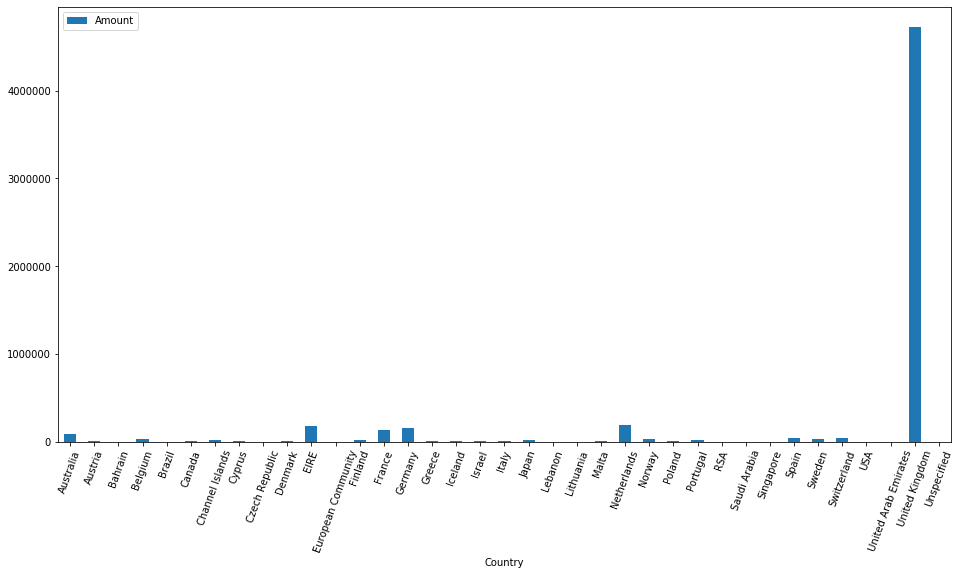

In [22]:
grouped[["Amount"]].plot(kind="bar",figsize=(16,8),rot = 70)
plt.show()

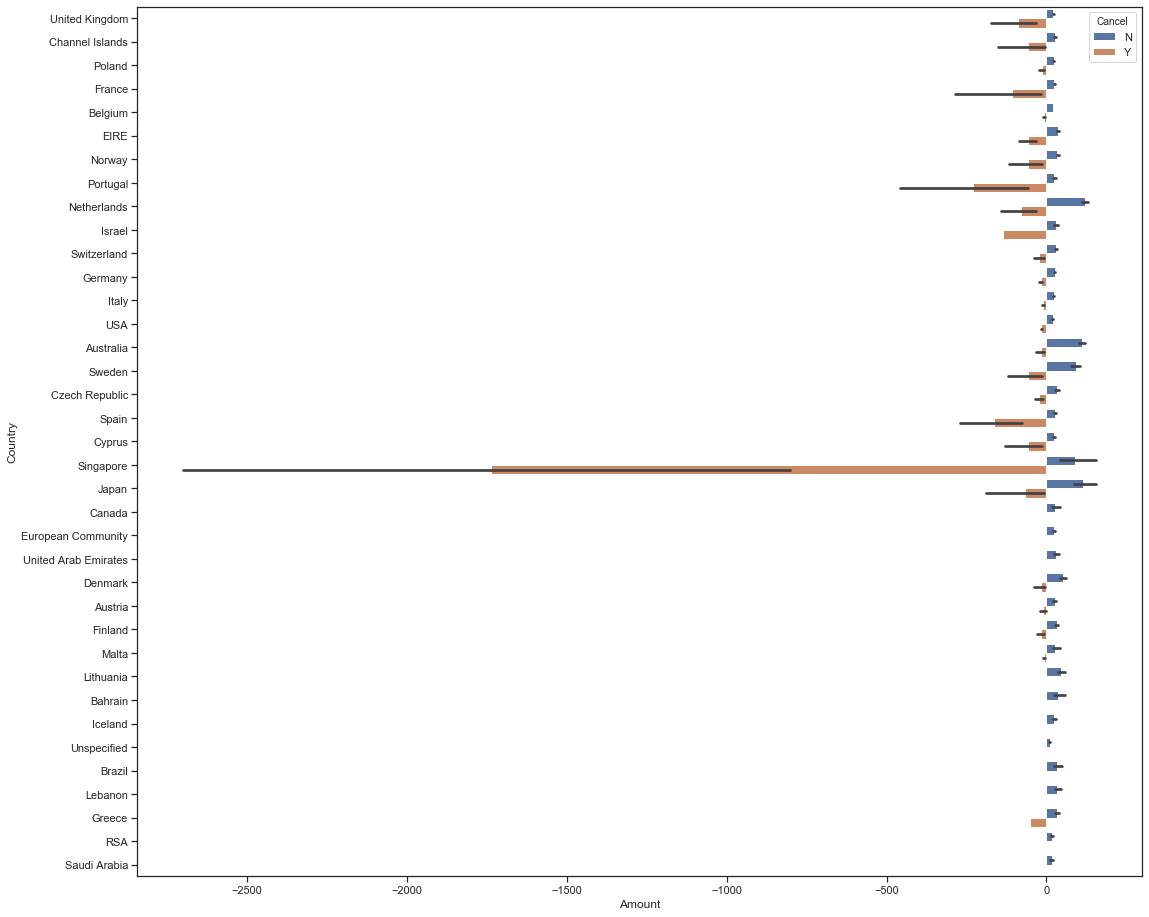

In [23]:
plt.figure(figsize=(18,16))
sns.set(style="ticks")
ax = sns.barplot(x="Amount",y="Country",data=train_df,hue="Cancel",)

In [24]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Amount
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,N,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,N,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,N,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,N,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,N,15.00


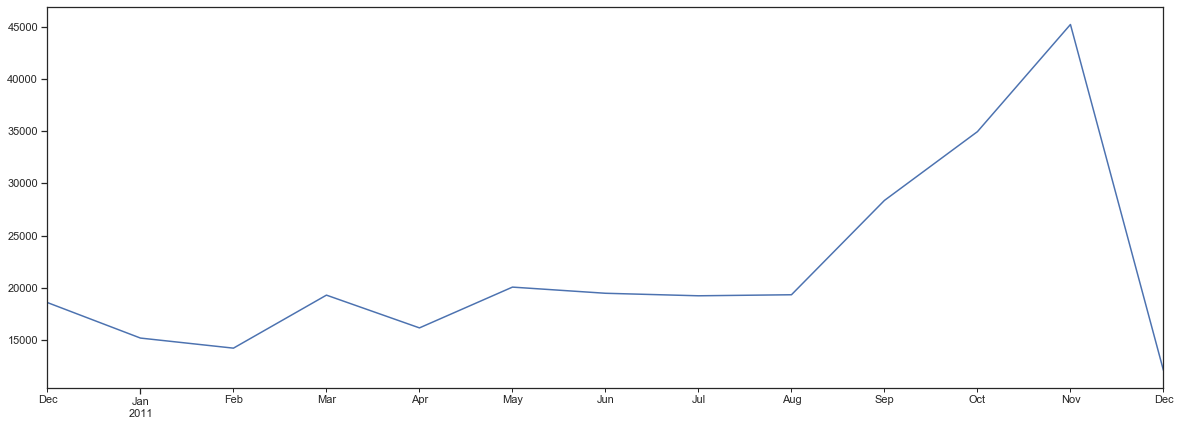

In [25]:
# Below graph shows the transaction rate over the period of given dataset
# From Dec- 2010 to Dec-2011 : where Nov - 2011 has captured the maximum transaction
train_df["InvoiceDate"].dt.to_period("M").value_counts(sort=False).plot(figsize=(20,7))
plt.show()

# Cohort Analysis

### Rough Work
1. Get first order date  --> Cohort Date
2. Get order date --> Order period  year & Month
3. Group by above two columns
4. followed by 3 get total customers,total orders, total sales
5. get cohort index
6. Now metrics
    a. unstack to convert to a matrix
    b. then divide by total * 100
7. Then plot it
    a. line plot
    b. heatmap

In [26]:
# Since we want first order date for a customer so we will make the customerID as the index so we can have first order date for each transaction
# per customer
train_df.set_index("CustomerID", inplace = True)
train_df["Cohort_Date"] = train_df.groupby(level=0)["InvoiceDate"].min().apply(lambda x: x.strftime("%Y-%m")) # "%Y-%m" used for year-month
train_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancel,Amount,Cohort_Date
CustomerID,,,,,,,,,,
16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,N,30.00,2011-02
18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,N,5.10,2010-12
15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,N,0.85,2010-12
14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,N,19.50,2010-12
13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,N,15.00,2011-02


In [27]:
train_df["Order_Period"] = train_df["InvoiceDate"].apply(lambda x: x.strftime("%Y-%m"))
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancel,Amount,Cohort_Date,Order_Period
CustomerID,,,,,,,,,,,
16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,N,30.00,2011-02,2011-06
18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,N,5.10,2010-12,2011-05
15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,N,0.85,2010-12,2011-01
14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,N,19.50,2010-12,2010-12
13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,N,15.00,2011-02,2011-05


In [28]:
# Restting index as we need the customerID 
train_df.reset_index(inplace=True)
train_df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancel,Amount,Cohort_Date,Order_Period
0,16126.0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,United Kingdom,N,30.00,2011-02,2011-06
1,18118.0,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,United Kingdom,N,5.10,2010-12,2011-05
2,15529.0,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,United Kingdom,N,0.85,2010-12,2011-01
3,14448.0,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,United Kingdom,N,19.50,2010-12,2010-12
4,13911.0,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,United Kingdom,N,15.00,2011-02,2011-05


In [29]:
#Preparing cohorts i.e. Unique customers , total sales, total transaction per order period per cohort
group  = train_df.groupby(["Cohort_Date","Order_Period"])
cohorts = group.agg({"CustomerID": pd.Series.nunique,
         "Amount": np.sum,
          "InvoiceNo": pd.Series.nunique})
cohorts.head()

CustomerID     Amount  InvoiceNo
Cohort_Date Order_Period                                  
2010-12     2010-12            929.0  381154.03       1587
            2011-01            350.0  189452.66        644
            2011-02            297.0  158767.40        529
            2011-03            353.0  199869.74        692
            2011-04            332.0  139648.98        571

In [30]:
# Defining a fucntion to mark the index for cohort because we will use index instead of order period twice
def create_cohort_index(df):
    df["Cohort_Index"] = np.arange(len(df)) + 1
    return df


In [31]:
# After grouping we have two index "Cohort_Date" and "Order_Date", we are using level=0 so that calculation is done 
#with Cohort Date i.e. First Order date
cohorts = cohorts.groupby(level=0).apply(create_cohort_index)
cohorts.head(16)

CustomerID     Amount  InvoiceNo  Cohort_Index
Cohort_Date Order_Period                                                
2010-12     2010-12            929.0  381154.03       1587             1
            2011-01            350.0  189452.66        644             2
            2011-02            297.0  158767.40        529             3
            2011-03            353.0  199869.74        692             4
            2011-04            332.0  139648.98        571             5
            2011-05            367.0  202535.71        737             6
            2011-06            351.0  196629.49        675             7
            2011-07            322.0  202312.29        637             8
            2011-08            325.0  216380.80        607             9
            2011-09            361.0  305675.19        748            10
            2011-10            344.0  294167.06        705            11
            2011-11            460.0  348983.56       1059            12
            2011-12            248.0  120513.00        355            13
2011-01     2011-01            422.0  152426.08        529             1
            2011-02            102.0   44659.26        147             2
            2011-03            120.0   53506.70        178             3

In [32]:
cohorts.rename(columns={"CustomerID": "Total_Customers", "Amount": "Total_Sales","InvoiceNo": "Total_Order" },inplace= True)
cohorts.head(16)

Total_Customers  Total_Sales  Total_Order  \
Cohort_Date Order_Period                                              
2010-12     2010-12                 929.0    381154.03         1587   
            2011-01                 350.0    189452.66          644   
            2011-02                 297.0    158767.40          529   
            2011-03                 353.0    199869.74          692   
            2011-04                 332.0    139648.98          571   
            2011-05                 367.0    202535.71          737   
            2011-06                 351.0    196629.49          675   
            2011-07                 322.0    202312.29          637   
            2011-08                 325.0    216380.80          607   
            2011-09                 361.0    305675.19          748   
            2011-10                 344.0    294167.06          705   
            2011-11                 460.0    348983.56         1059   
            2011-12                 248.0    120513.00          355   
2011-01     2011-01                 422.0    152426.08          529   
            2011-02                 102.0     44659.26          147   
            2011-03                 120.0     53506.70          178   

                          Cohort_Index  
Cohort_Date Order_Period                
2010-12     2010-12                  1  
            2011-01                  2  
            2011-02                  3  
            2011-03                  4  
            2011-04                  5  
            2011-05                  6  
            2011-06                  7  
            2011-07                  8  
            2011-08                  9  
            2011-09                 10  
            2011-10                 11  
            2011-11                 12  
            2011-12                 13  
2011-01     2011-01                  1  
            2011-02                  2  
            2011-03                  3

In [33]:
# Changing the index to Cohort_Date & Cohort_index
cohorts.reset_index(inplace=True)
cohorts.set_index(["Cohort_Date","Cohort_Index"],inplace=True)

In [34]:
cohorts.head()

Order_Period  Total_Customers  Total_Sales  \
Cohort_Date Cohort_Index                                              
2010-12     1                 2010-12            929.0    381154.03   
            2                 2011-01            350.0    189452.66   
            3                 2011-02            297.0    158767.40   
            4                 2011-03            353.0    199869.74   
            5                 2011-04            332.0    139648.98   

                          Total_Order  
Cohort_Date Cohort_Index               
2010-12     1                    1587  
            2                     644  
            3                     529  
            4                     692  
            5                     571

In [35]:
# T gives us the transpose of the matrix which is a better viusal
# unstack is used to level the pivot and prepare customer retention matrix
cohorts["Total_Customers"].unstack(level=0).T

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
2010-12,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# First column or first cohort index is considered as 100% new customer
group_size = cohorts["Total_Customers"].groupby(level=0).first()
group_size

Cohort_Date
2010-12    929.0
2011-01    422.0
2011-02    377.0
2011-03    441.0
2011-04    298.0
2011-05    278.0
2011-06    238.0
2011-07    192.0
2011-08    166.0
2011-09    298.0
2011-10    352.0
2011-11    323.0
2011-12     39.0
Name: Total_Customers, dtype: float64

In [37]:
# Customer retention Matrix - where we see how much customer client was able to retain over the cohort period in percentage
retention = cohorts["Total_Customers"].unstack(level=0).divide(group_size * 0.01)
retention.T

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Date,,,,,,,,,,,,,
2010-12,100.0,37.674919,31.969860,37.997847,35.737352,39.504844,37.782562,34.660926,34.983854,38.858988,37.029064,49.515608,26.695371
2011-01,100.0,24.170616,28.436019,24.644550,33.412322,28.909953,26.777251,25.829384,31.279621,35.071090,37.203791,15.639810,NaN
2011-02,100.0,24.137931,19.098143,26.790451,27.055703,24.137931,25.198939,26.790451,25.729443,31.034483,8.488064,NaN,NaN
2011-03,100.0,18.367347,24.943311,21.088435,22.902494,17.233560,25.623583,23.356009,28.344671,8.390023,NaN,NaN,NaN
2011-04,100.0,22.483221,21.812081,20.134228,20.469799,23.825503,23.154362,26.174497,7.718121,NaN,NaN,NaN,NaN
2011-05,100.0,21.582734,17.266187,17.266187,21.223022,24.820144,26.618705,10.431655,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,19.327731,18.067227,26.050420,23.949580,33.613445,10.504202,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.312500,19.791667,23.437500,28.645833,10.937500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,22.891566,24.698795,24.698795,13.855422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


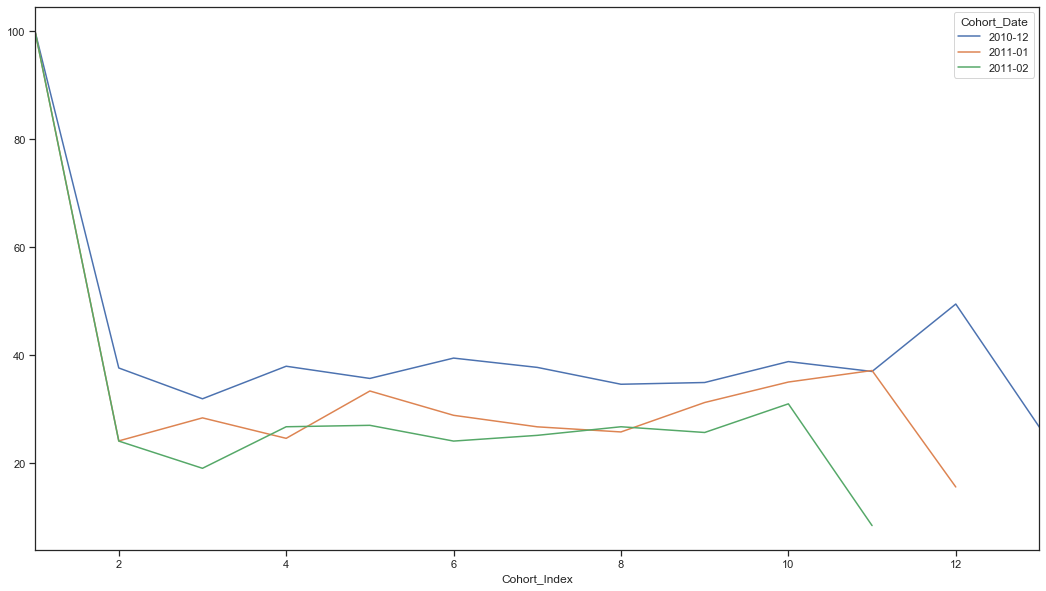

In [38]:
# Plotting customer retention for three cohort months
retention[["2010-12","2011-01","2011-02"]].plot(figsize=(18,10))

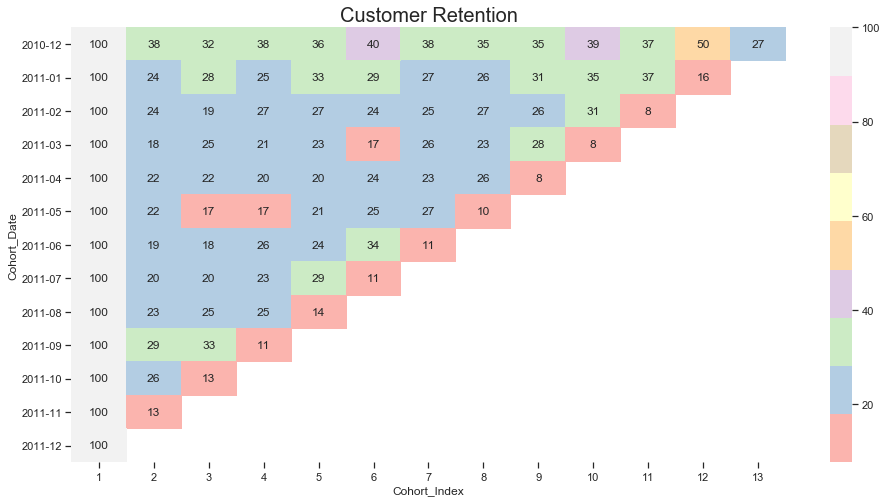

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(retention.T,annot=True,cmap="Pastel1",fmt="0.0f")
plt.title("Customer Retention",size= 20)
plt.show()

## Understanding the above heatmap
#### 1. Each row indicates newly accquired customers and their retention throughout the period
#### 2. Customer first purchase is considered as 100 to convert all the calculation in percentage
#### 3. Eg. for "2011-01" only 24% of customers where retained in next month. 28% retention month following that and so on.....
#### 5. "group_size" dataframe shows the actual number of customer that comprises 100%

# Task for Week - 2

In [40]:
# Max date transaction
now = train_df["InvoiceDate"].max()
now

Timestamp('2011-12-09 12:50:00')

In [41]:
# For calculating the recency of an transaction we use max date as the current date
import datetime as dt
now = dt.date(2011,12,9)
now

datetime.date(2011, 12, 9)

In [42]:
train_df["InvoiceDate"] = pd.DatetimeIndex(train_df["InvoiceDate"]).date

In [43]:
t = train_df.groupby("CustomerID")
RFMdata = t.agg({"InvoiceNo": 'count',
                 "Amount": 'sum',
                 "InvoiceDate": lambda x: now - x.max()})
RFMdata.head()

,InvoiceNo,Amount,InvoiceDate
CustomerID,,,
12346.0,2,0.00,325 days
12347.0,132,3124.96,2 days
12348.0,20,1009.88,75 days
12349.0,50,1344.17,18 days
12350.0,11,213.30,310 days


In [44]:
# Checking for distribution of our R F M
RFMdata.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,4353,64.8794,161.445,1,12,29,71,5511
Amount,4353,1325.71,5550.92,-4287.63,200.77,457.1,1136.8,190309
InvoiceDate,4353,92 days 04:42:30.516884,101 days 03:44:35.683990,0 days 00:00:00,17 days 00:00:00,50 days 00:00:00,144 days 00:00:00,373 days 00:00:00


In [45]:
#numeric_only false helps in getting quartiles for date time also
segment = RFMdata.quantile(q=[0.25,0.5,0.75],numeric_only=False)
segment = segment.to_dict()
segment 

{'InvoiceNo': {0.25: 12.0, 0.5: 29.0, 0.75: 71.0},
 'Amount': {0.25: 200.77000000000004,
  0.5: 457.09999999999985,
  0.75: 1136.7999999999997},
 'InvoiceDate': {0.25: Timedelta('17 days 00:00:00'),
  0.5: Timedelta('50 days 00:00:00'),
  0.75: Timedelta('144 days 00:00:00')}}

In [46]:
segment["Amount"][0.25]

200.77000000000004

In [47]:
# creating R_segment where recent order falls in first quartile will be give 1 priorty second quartile will be given 2 priorty and so on..
RFMdata["R_segment"] = RFMdata["InvoiceDate"].apply(lambda x: 1 if (x < segment["InvoiceDate"][0.25]) 
                                                     else 2 if (x > segment["InvoiceDate"][0.25] and x < segment["InvoiceDate"][0.5]) 
                                                     else 3 if (x > segment["InvoiceDate"][0.5] and x < segment["InvoiceDate"][0.75]) 
                                                     else 4)

In [48]:
RFMdata.head(12)

,InvoiceNo,Amount,InvoiceDate,R_segment
CustomerID,,,,
12346.0,2,0.00,325 days,4
12347.0,132,3124.96,2 days,1
12348.0,20,1009.88,75 days,3
12349.0,50,1344.17,18 days,2
12350.0,11,213.30,310 days,4
12352.0,65,1469.03,36 days,2
12353.0,3,71.30,204 days,4
12354.0,47,848.02,232 days,4
12355.0,9,370.80,214 days,4


In [49]:
# creating F_segment where recent order falls in first quartile will be give 4 priorty second quartile will be given 3 priorty and so on..
RFMdata["F_segment"] = RFMdata["InvoiceNo"].apply(lambda x: 4 if (x < segment["InvoiceNo"][0.25]) 
                                                     else 3 if (x > segment["InvoiceNo"][0.25] and x < segment["InvoiceNo"][0.5]) 
                                                     else 2 if (x > segment["InvoiceNo"][0.5] and x < segment["InvoiceNo"][0.75]) 
                                                     else 1)

In [50]:
# creating M_segment where recent order falls in first quartile will be give 4 priorty second quartile will be given 3 priorty and so on..
RFMdata["M_segment"] = RFMdata["Amount"].apply(lambda x: 4 if (x < segment["Amount"][0.25]) 
                                                     else 3 if (x > segment["Amount"][0.25] and x < segment["Amount"][0.5]) 
                                                     else 2 if (x > segment["Amount"][0.5] and x < segment["Amount"][0.75]) 
                                                     else 1)

In [51]:
RFMdata.rename(columns={"InvoiceDate": "Recency", "Amount": "Monetary","InvoiceNo": "Frequency" },inplace= True)
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment
CustomerID,,,,,,
12346.0,2,0.00,325 days,4,4,4
12347.0,132,3124.96,2 days,1,1,1
12348.0,20,1009.88,75 days,3,3,2
12349.0,50,1344.17,18 days,2,2,1
12350.0,11,213.30,310 days,4,4,3


In [52]:
# Combining RFM and using this RFM as a metric
RFMdata["RFM"] = RFMdata.R_segment.map(str) + RFMdata.F_segment.map(str) + RFMdata.M_segment.map(str)

In [53]:
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM
CustomerID,,,,,,,
12346.0,2,0.00,325 days,4,4,4,444
12347.0,132,3124.96,2 days,1,1,1,111
12348.0,20,1009.88,75 days,3,3,2,332
12349.0,50,1344.17,18 days,2,2,1,221
12350.0,11,213.30,310 days,4,4,3,443


In [54]:
RFMdata["RFM"] = RFMdata["RFM"].astype(int)

In [55]:
# Count of best customers & worst customers
RFMdata[RFMdata["RFM"] == 111].shape,RFMdata[RFMdata["RFM"] == 444].shape

((450, 7), (394, 7))

In [56]:
RFMdata["RFM_Score"] = RFMdata[["R_segment","F_segment","M_segment"]].sum(axis=1)
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,RFM_Score
CustomerID,,,,,,,,
12346.0,2,0.00,325 days,4,4,4,444,12
12347.0,132,3124.96,2 days,1,1,1,111,3
12348.0,20,1009.88,75 days,3,3,2,332,8
12349.0,50,1344.17,18 days,2,2,1,221,5
12350.0,11,213.30,310 days,4,4,3,443,11


In [57]:
# Based on RFM score categorising the cutsomer membership level in 4 groups
Customer_rank = ["Platinum","Gold","Silver","Bronze"]
RFMdata["Customer_Value"] = pd.qcut(RFMdata.RFM_Score,q= 4, labels=Customer_rank)
RFMdata.head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,RFM_Score,Customer_Value
CustomerID,,,,,,,,,
12346.0,2,0.00,325 days,4,4,4,444,12,Bronze
12347.0,132,3124.96,2 days,1,1,1,111,3,Platinum
12348.0,20,1009.88,75 days,3,3,2,332,8,Silver
12349.0,50,1344.17,18 days,2,2,1,221,5,Platinum
12350.0,11,213.30,310 days,4,4,3,443,11,Bronze


In [58]:
RFMdata.loc[RFMdata["RFM"] == 111].head()

,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,RFM_Score,Customer_Value
CustomerID,,,,,,,,,
12347.0,132,3124.96,2 days,1,1,1,111,3,Platinum
12359.0,181,4681.17,7 days,1,1,1,111,3,Platinum
12362.0,183,3463.01,3 days,1,1,1,111,3,Platinum
12388.0,78,2235.13,15 days,1,1,1,111,3,Platinum
12395.0,113,2189.10,15 days,1,1,1,111,3,Platinum


# Task for week 3

In [59]:
graph = RFMdata
graph.reset_index(inplace=True)

In [60]:
graph.head()

,CustomerID,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,RFM_Score,Customer_Value
0,12346.0,2,0.00,325 days,4,4,4,444,12,Bronze
1,12347.0,132,3124.96,2 days,1,1,1,111,3,Platinum
2,12348.0,20,1009.88,75 days,3,3,2,332,8,Silver
3,12349.0,50,1344.17,18 days,2,2,1,221,5,Platinum
4,12350.0,11,213.30,310 days,4,4,3,443,11,Bronze


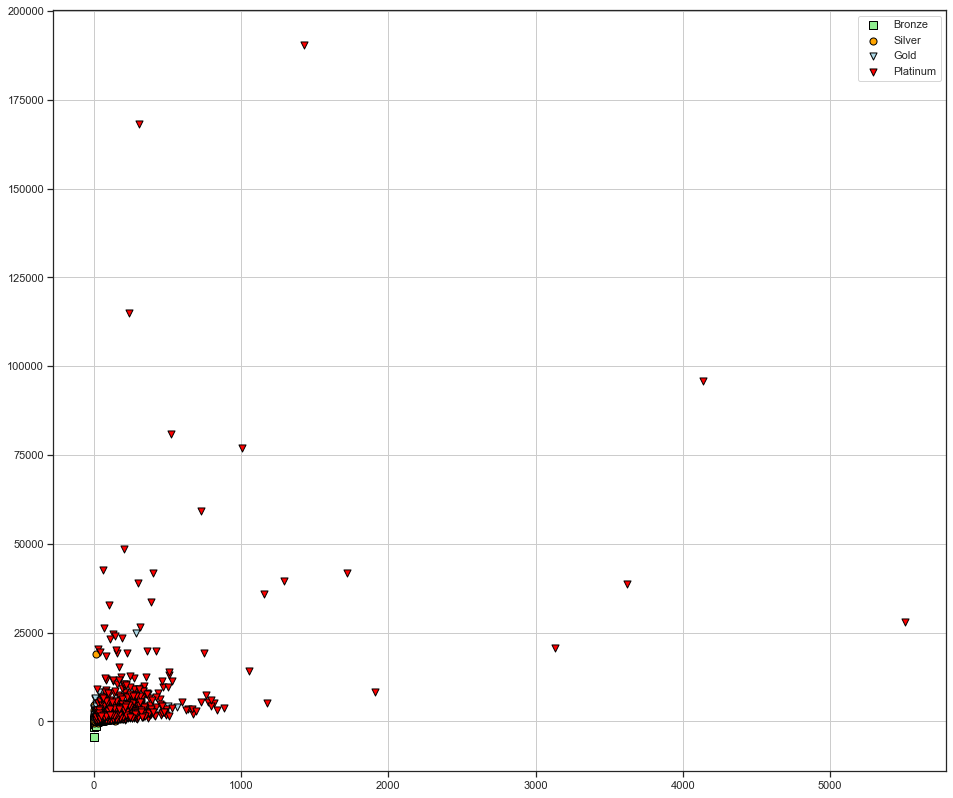

In [61]:
X0 = graph.loc[graph["Customer_Value"] == "Bronze"]["Frequency"]
Y0 = graph.loc[graph["Customer_Value"] == "Bronze"]["Monetary"]

X2 = graph.loc[graph["Customer_Value"] == "Silver"]["Frequency"]
Y2 = graph.loc[graph["Customer_Value"] == "Silver"]["Monetary"]

X3 = graph.loc[graph["Customer_Value"] == "Gold"]["Frequency"]
Y3 = graph.loc[graph["Customer_Value"] == "Gold"]["Monetary"]

X4 = graph.loc[graph["Customer_Value"] == "Platinum"]["Frequency"]
Y4 = graph.loc[graph["Customer_Value"] == "Platinum"]["Monetary"]

plt.figure(figsize=(16,14))
# plot the 3 clusters
plt.scatter(
    X0, Y0,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Bronze'
)

plt.scatter(
    X2, Y2,
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Silver'
)

plt.scatter(
    X3, Y3,
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Gold'
)

plt.scatter(
    X4, Y4,
    s=50, c='red',
    marker='v', edgecolor='black',
    label='Platinum'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()


In [60]:
# Export to tableau for dashboard
graph.to_excel(r"G:\Simplilearn\Capstone_Project\Retail_project\RFMdata.xlsx",index=False)

In [62]:
# Preparing data for KMeans Algorithim
X = graph[["Frequency","Monetary","Recency"]]
X["Recency"] = (X["Recency"] / np.timedelta64(1, 'D')).astype(int) 
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Frequency,Monetary,Recency
0,2,0.00,325
1,132,3124.96,2
2,20,1009.88,75
3,50,1344.17,18
4,11,213.30,310


In [63]:
#Instanciating the Scaler
SS = StandardScaler()

In [64]:
# Since the input variables are not in same scale so Kmeans clustering won't be effective as it is distance based - we need to scale
X1 = SS.fit_transform(X)

In [65]:
#Performing KMeans with 4 cluster and will observe the error

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X1)

In [66]:
y_cluster = pd.DataFrame(y_km, columns=["Cluster"])

In [67]:
y_cluster["Cluster"].value_counts()

2    2993
3    1074
0     274
1      12
Name: Cluster, dtype: int64

In [68]:
graph.Customer_Value.value_counts()

Silver      1393
Platinum    1260
Gold         926
Bronze       774
Name: Customer_Value, dtype: int64

In [69]:
km.inertia_ # Indicates within sum of square of distance of sample points with its cluster centroid

4424.429158239656

## As we see above there are many sample points which are not assigned to correct cluster
## We will perform Elbow method to identify the optimal number of cluster for this dataset

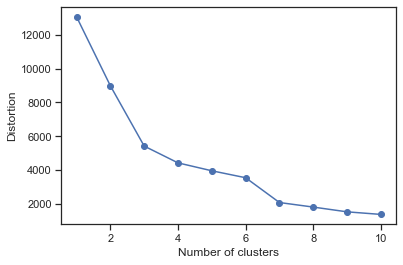

In [70]:
# Calculating error (inertia__) and plotting it against number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        random_state=0
    )
    km.fit(X1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


# The above Graph shows that 7 cluster is an optimal number of cluster

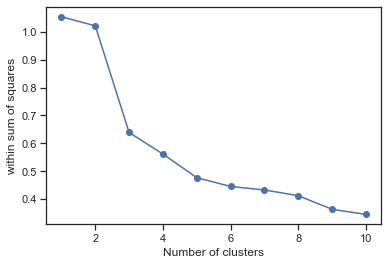

In [71]:
# Calculating error (distance between points & cluster centroid) and plotting it against number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X1)
    distortions.append(sum(np.min(distance.cdist(X1,km.cluster_centers_,'euclidean'),axis=1))/X1.shape[0])

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('within sum of squares')
plt.show()



# The above Graph shows that 9 cluster is also an optimal number of cluster
# we will leave upto business how many cluster they want
# We will use only 7 cluster as it better to have less number of cluster and prepare our final model

In [72]:
Km = KMeans(n_clusters=7,init="random",random_state=0)
Y_Km = Km.fit_predict(X1)

In [73]:
Y_cluster = pd.DataFrame(Y_Km, columns=["Cluster"])

In [74]:
graph.shape,Y_cluster.shape

((4353, 10), (4353, 1))

In [75]:
Output = pd.concat([graph,Y_cluster],axis=1)
Output.head()

,CustomerID,Frequency,Monetary,Recency,R_segment,F_segment,M_segment,RFM,RFM_Score,Customer_Value,Cluster
0,12346.0,2,0.00,325 days,4,4,4,444,12,Bronze,5
1,12347.0,132,3124.96,2 days,1,1,1,111,3,Platinum,3
2,12348.0,20,1009.88,75 days,3,3,2,332,8,Silver,2
3,12349.0,50,1344.17,18 days,2,2,1,221,5,Platinum,2
4,12350.0,11,213.30,310 days,4,4,3,443,11,Bronze,5


In [76]:
Output.shape

(4353, 11)

In [77]:
Output.Cluster.value_counts()

2    2488
4     773
5     616
3     429
0      38
6       5
1       4
Name: Cluster, dtype: int64

In [78]:
Output.Customer_Value.value_counts()

Silver      1393
Platinum    1260
Gold         926
Bronze       774
Name: Customer_Value, dtype: int64

In [132]:
# Export to tableau for dashboard
Output.to_excel(r"G:\Simplilearn\Capstone_Project\Retail_project\Output.xlsx",index=False)

# Below is the link for Tableau Dashboard and graphs

 Tableau link - https://public.tableau.com/profile/kumarnvn#!/vizhome/CustomerSegmentationInsights_15857171377770/Story1?publish=yes

In [79]:
img = mpimg.imread('G:\Simplilearn\Capstone_Project\Retail_project\Tableau_Insights.png')

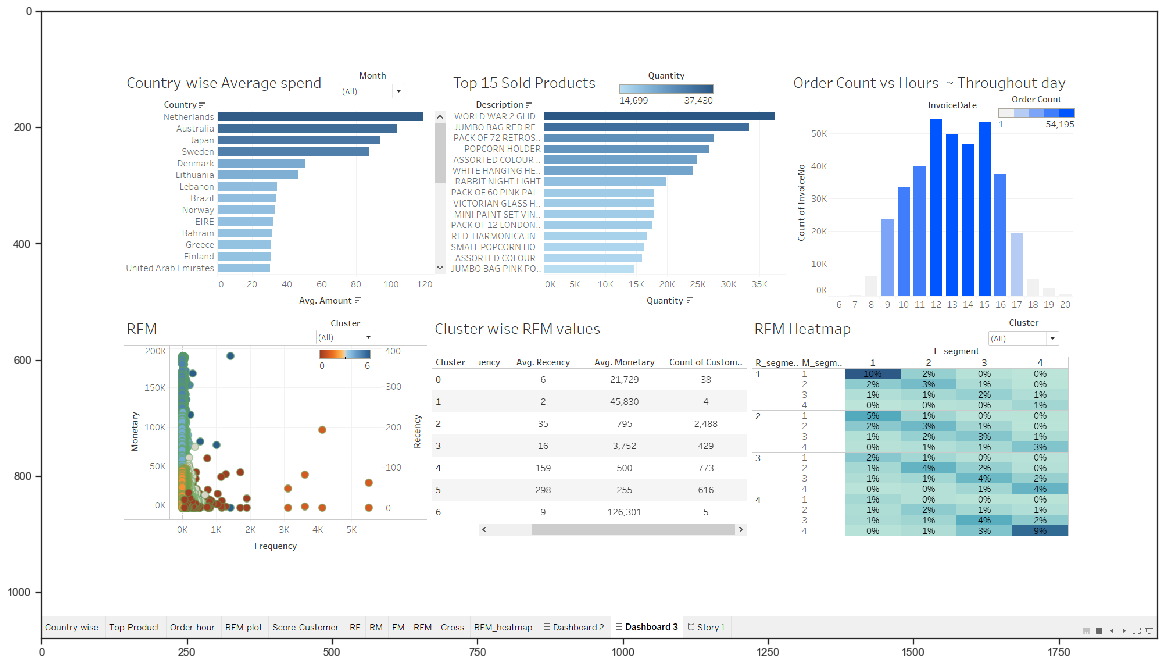

In [80]:
plt.figure(figsize=(20,18))
plt.imshow(img)
plt.show()

# Conclusion

1. We have identifed the way to clusters our customers with optimal cluster being 7 where error did not decrease significantly
2. Based on Mean cost spend by the customer  promotion or membership can be decided
3. Based on Mean frequency of customer promotion date and time can be decided as most of the sales happen during day time 12 PM - 3 PM
4. Top 15 sold products will help in inventory  management
5. Customer retention heatmap will help in schedule the promotion event date

 #                                                               Thank you !!!